# Inteligencia Artificial 1
## Curso 2022/23
### Grado en Ingeniería Informática
Mª Belen Díaz Agudo

# Aprendizaje por refuerzo (parte 2)

Hasta ahora hemos visto sólo entornos discretos y el uso de Q-Learning. 
En este notebook aprenderas a utilizar otros algoritmos de RL usando la librería stable-baselines3 (SB3)
https://stable-baselines3.readthedocs.io/en/master/

No entraremos en los detalles de los algoritmos de SB3 aunque puedes parametrizarlos de forma parecida a lo que hemos hecho con el algoritmo Q-learning. Estos algoritmos de RL permiten trabajar con entornos continuos (o discretos pero grandes) y utilizan redes neuronales durante el entrenamiento en lugar de una tabla estática.
Tambien veremos distintos tipos de métricas para evaluar el modelo de IA y como guardar y cargar modelos, y como usar callbacks para terminar el entrenamiento usando condiciones (umbrales por ejemplo de recompensa media) en vez de un número fijo de episodios.
Se muestra el ejemplo sencillo de gym Cart-Pole (parte del material es adaptado de Nicholas Renotte) que, como ya vimos, es un entorno continuo. Después de este ejemplo ya puedes entrenar IAs que aprendan cualquiera de los entornos de gym algo más interesantes.

In [2]:
# Lo primero que necesitaras es instalar las librerías. 
# Para este notebook he verificado que todo funciona bien con la instalación de paquetes siguiente:
# gym                          0.21.0
# tensorboard                  2.10.1
# tensorflow                   2.6.0
# stable-baselines3            1.6.2
# numpy                        1.23.4

!pip install stable-baselines3[extra]
# !pip install --user su stable-baselines3[extra]


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [3]:
#Con este comando puedes saber qué paquetes están instalados.
!python -m pip list

Package                    Version
-------------------------- -------------------
absl-py                    1.3.0
ale-py                     0.7.4
anyio                      3.6.1
appdirs                    1.4.4
argcomplete                1.12.3
argon2-cffi                20.1.0
asttokens                  2.0.8
async-generator            1.10
asyncpg                    0.26.0
attrs                      21.2.0
audioread                  2.1.9
AutoROM                    0.4.2
AutoROM.accept-rom-license 0.4.2
backcall                   0.2.0
bcrypt                     3.2.0
beautifulsoup4             4.10.0
bleach                     4.0.0
bottle                     0.12.19
brotlipy                   0.7.0
bs4                        0.0.1
cachetools                 5.0.0
capstone                   4.0.2
certifi                    2021.10.8
cffi                       1.14.6
chardet                    4.0.0
charset-normalizer         2.1.0
classes                    0.4.1
click           

webp                       0.1.4
websocket-client           1.2.3
websockets                 10.3
Werkzeug                   2.2.2
wheel                      0.36.2
widgetsnbextension         3.5.1
wpm                        1.51.5
z3-solver                  4.8.13.0
zipp                       3.5.0

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [4]:
import os 
import gym 
# https://stable-baselines3.readthedocs.io/en/master/
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [ ]:
# https://www.gymlibrary.dev/environments/classic_control/cart_pole/
environment_name = "CartPole-v1"
env = gym.make(environment_name)

In [ ]:
episodes = 20
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:  #cada episodio termina con done
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Puedes encontrar documentación del entorno Cart Pole en la documentación de Gym
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py
Observamos el espacio de acciones y las observaciones (estados) en este entorno. 
Las siguientes llamadas permiten entender el entorno. Vemos que hay dos acciones posibles y los estados tienen 4 valores continuos. 

In [ ]:
env.action_space

In [ ]:
env.action_space.sample()

In [ ]:
env.observation_space

In [ ]:
env.observation_space.sample()

# ¿Cómo entrenar una IA usando distintos algoritmos de RL?
En primer lugar vamos a usar un algoritmo de RL llamado PPO de la librería stable-baselines3 (SB3)

https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#a-taxonomy-of-rl-algorithms
https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html

PPO algorithm Original paper: https://arxiv.org/abs/1707.06347

Clear explanation of PPO on Arxiv Insights channel: https://www.youtube.com/watch?v=5P7I-xPq8u8

In [ ]:
# los directorios tienen que estar creados con antelación
# os.makedirs(log_dir, exist_ok=True) 
log_path = os.path.join('Training','Logs')
log_path

In [ ]:
env = gym.make(environment_name).env
# Wrapper para vectorizar nuestro entorno 
env = DummyVecEnv([lambda: env])
# Creamos el modelo de IA para este entorno. 
# MLpPolicy indica el tipo de red neuronal que se está usando. 
# La politica (seleccion de acciones) puede ser de 3 tipos en SB3: MlpPolicy, CnnPolicy and MultiInputPolicy 
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

# Hemos creado el modelo de IA que aprende pero todavía no se ha ejecutado el modelo ni ha aprendido nada.

# sobre la instalación de pytorch podéis probar a instalar versiones con CUDA. Yo he instalado la version que ejecuta en la CPU local. 
# conda install pytorch==1.8.1 torchvision==0.9.1 torchaudio==0.8.1 cpuonly -c pytorch
# En la página de pytorch se puede ver como instalarlo con CUDA

In [ ]:
# Para saber más del algoritmo PPO hay urls arriba y se puede ver la documentación, signatura y parametros usando ??
# tenemos algunos parámetros para configurar conocidos como el ratio de aprendizaje y gamma : learning_rate= 0.0003, n_steps: int = 2048, batch_size: int = 64, n_epochs: int = 10, gamma: float = 0.99,  gae_lambda: float = 0.95,
PPO??

In [ ]:
model.learn(total_timesteps=20000)
# ahora entrenamos el modelo.

In [ ]:
env.close()

# Guardar y volver a cargar el modelo entrenado
El modelo de IA que hemos creado se puede guardar, y luego cargarlo y volver a entrenarlo. Se puede ver en los directorios como se guarda la información. 

In [ ]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')
model.save(PPO_path)

In [ ]:
del model
# ahora cualquier accion con el modelo daría error. Hasta que lo volvamos a cargar
model = PPO.load(PPO_path, env=env)

In [ ]:
# Vamos a entrenar un modelo con 100000 time_steps y lo guardamos. 
log_dir = os.path.join('Training','Logs')
environment_name = "CartPole-v1"
env = gym.make(environment_name)
env = Monitor(env, log_dir)
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_dir)
# Train the agent 
time_steps = 1e5   
model.learn(total_timesteps=int(time_steps))
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model2')
model.save(PPO_path)
#del model
#model = PPO.load(PPO_path, env=env)

# Evaluación del modelo de IA (¿ha aprendido bien?)

In [ ]:
# En las metricas de PPO no tenemos datos de rendimiento (ep_len o ep_rew, la longitud y reward de cada episodio)
# Vamos a revisar evaluación y las métricas de entrenamiento con tensorboard.

# Podemos usar evaluate_policy (lo hemos importado) y vamos a usar un wrapper Monitor para el entorno que incluye nuevas métricas.
# Depende del problema cuando se considera que el problema se ha resuelto. 
# En este modelo en concreto se considera que se ha resuelto si el tiempo que aguanta es 500  o mayor. (puntuacion score average de 200)
# Algunos no tienen límite, cuanto más puntuación mejor. 

# Solo al visualizarlo se ve muchísimo más estable que en la ejecución aleatoria. 
# También queremos tener las métricas. El resultado es la media del score y la desviación típica. 

    En los resultados se ve muy bien como progresa el aprendizaje 
    rollout/               
        |    ep_len_mean          | 145          |   media de la longitud del episodio
        |    ep_rew_mean          | 145          |   media de la recompensa.
        
    En este dominio la recompensa es igual que la longitud (se premia durar más tiempo en equilibrio)

In [ ]:
from stable_baselines3.common.results_plotter import plot_results, load_results, ts2xy
from stable_baselines3.common import results_plotter


log_dir = os.path.join('Training','Logs')
environment_name = "CartPole-v1"
env = gym.make(environment_name)
env = Monitor(env, log_dir)
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_dir)
# Train the agent 
time_steps = 1e5   
model.learn(total_timesteps=int(time_steps))
# si se borra el modelo se debería poder sustituir por 
#PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')
#model = PPO.load(PPO_path, env=env)

evaluate_policy(model, env, n_eval_episodes=10, render=False)
plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "Cart Pole")
env.close()

In [ ]:
## lo guardamos para poder usarlo en otro momento
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model2')
model.save(PPO_path)

# ¿Cómo usamos el modelo de IA que hemos entrenado?

In [ ]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model2')
# El modelo entrenado está guardado y vamos a cargarlo y a usarlo para elegir qué acción debemos ejecutar en cada estado (fase de explotación)
model = PPO.load(PPO_path, env=env)

In [ ]:
estado = env.reset()
print(estado)
# el segundo parámetro es el estado siguiente que no lo vamos a usar (se usa en políticas recurrentes)
action, _ = model.predict(estado) 
print (action)
env.step(action) # la reward aquí siempre es 1 (si no te caes) --> es bastante simple.

Recordamos los estados (las observaciones) eran cart position, cart velocity, pole angle, pole angular velocity
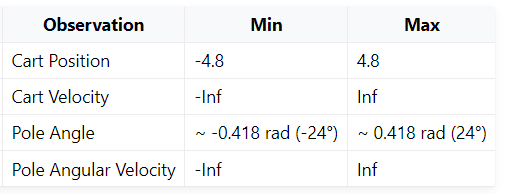
y las acciones 
Action 0 Push cart to the left
Action 1 Push cart to the right
https://www.gymlibrary.dev/environments/classic_control/cart_pole/

In [ ]:
log_dir = os.path.join('Training','Logs')
environment_name = "CartPole-v1"
env = gym.make(environment_name)
env = Monitor(env, log_dir)

In [ ]:
# Este fragmento de código lo habíamos usado al principio con ejecucion aleatoria de acciones. 
# Ahora la acción la elige la IA con lo que ha aprendido. 
# Observación del estado y usar el modelo para elegir la acción que máximiza la recompensa en el modelo entrenado previamente. 
# Antes teníamos la matriz Q ahora lo consultamos en el modelo con predict()
# action = env.action_space.sample()  
# n_state, reward, done, info = env.step(action)

episodes = 5
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0 
    
    while not done:  #cada episodio termina con done
        env.render()
        action, _ = model.predict(obs)  
        obs, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

En los resultados se ve que ha aprendido muy bien y se consigue el score máximo en los 5 episodios.

Episode:1 Score:500.0
Episode:2 Score:500.0
Episode:3 Score:500.0
Episode:4 Score:500.0
Episode:5 Score:500.0

In [ ]:
env.close()

# Visualización de métricas en Tensorboard

No vamos a entrar en muchos detalles pero os dejo información sobre cómo visualizar todos los datos del entrenamiento usando los logs de Tensorboard. 

In [ ]:
log_dir

In [ ]:
training_log_path = os.path.join(log_dir, 'PPO_2')

In [ ]:
# Si lo ejecutas aquí se queda en [*] y hay que pararlo a mano.
# Se puede ejecutar en linea de comandos.
!tensorboard --logdir={training_log_path} 
# Lo que ocurre en ambos casos es que se lanza tensorboard en el puerto http://localhost:6006/

Al abrir en un navegador el puerto http://localhost:6006/ se visualiza el panel de tensorboard. 
TensorBoard: es un conjunto de aplicaciones web para inspeccionar, visualizar y comprender las ejecuciones y gráficos de TensorFlow.

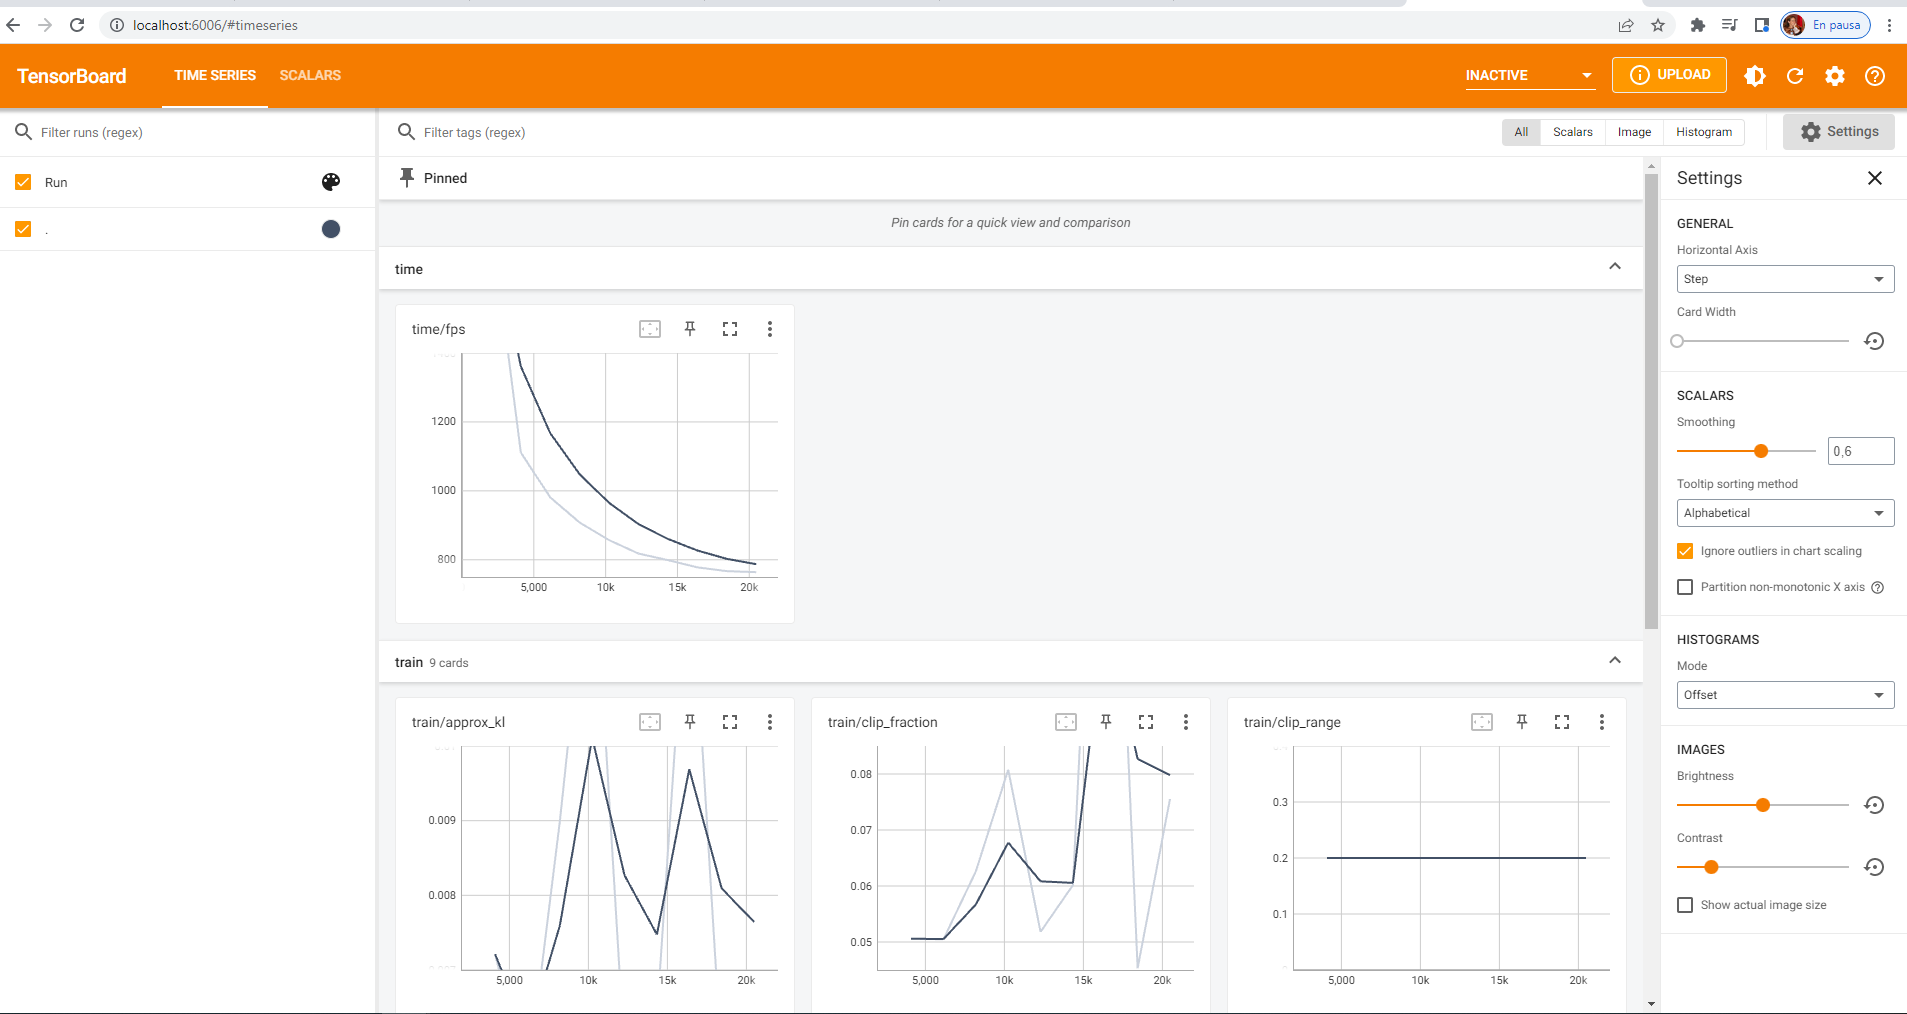

# Añadir callback para terminar la etapa de entrenamiento 
Añadir condiciones de callback permite parar el entrenamiento cuanod se ha llegado a un cierto nivel de recompensa media (reward threshold). 
Evita que los modelos se vuelvan inestables. Le puedes limitar y dar condiciones para terminar el proceso de entrenamiento en vez de entrenar un número fijo de pasos como hemos hecho hasta ahora. 

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [ ]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')
# Hemos visto que un umbral de 500 es lo que obtiene al final. Vamos a poner un valor menor y observar el modelo.
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [ ]:
environment_name = "CartPole-v1"
env = gym.make(environment_name)
log_dir = os.path.join('Training','Logs')
env = Monitor(env, log_dir)

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
# En el aprendizaje le pasamos el callback para que pueda terminar antes de los 20000 episodios. 
model.learn(total_timesteps=20000, callback=eval_callback)

Se ve que termina en cuando consigue superar el umbral que lo habíamos puesto en 190. 
New best mean reward!
Stopping training because the mean reward 500.00  is above the threshold 190
Además tenemos el modelo guardado en la carpeta saved Models y ahora podemos cargarlo.

In [ ]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [ ]:
env.close()

# Cambiar arquitectura y algoritmo de RL
Se pueden usar distintas arquitecturas de redes neuronales que se usan durante el entrenamiento. Esta red neuronal sustituye a la tabla Q que hemos visto en Q-Learning. De momento esto lo contamos solo superficialmente hasta que aprendáis más sobre redes neuronales y sus arquitecturas.  Podemos especificar el número de neuronas y el número de capas. 

In [ ]:
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]
# 2 redes neuronales (una para custom actor) 4 capas de 128 unidades cada una
# otra red neuronal para value factor de la misma configuración. 

In [ ]:
## COPIAMOS ESTO AQUI QUE ES LO MISMO DE ANTES.
environment_name = "CartPole-v1"
env = gym.make(environment_name)
log_dir = os.path.join('Training','Logs')
env = Monitor(env, log_dir)
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')
# Hemos visto que un umbral de 500 es lo que obtiene al final. Vamos a poner un valor menor y observar el modelo.
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [ ]:
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

In [ ]:
# Añadimos un callback que termina el entrenamiento al llegar al valor mejor y considerar el modelo totalmente entrenado.
model.learn(total_timesteps=20000, callback=eval_callback)


In [ ]:
# Ahora vamos a cambiar de algoritmo 
# y en vez de usar PPO vamos a usar DQN por ejemplo. Se puede consultar la documentación de SB3 para ver otras opciones. Al principio de este notebook tenéis enlace a la documentación.
# El resto de pasos son iguales que los que hemos visto con PPO.
from stable_baselines3 import DQN

In [ ]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

In [ ]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [ ]:
model.save(dqn_path)

In [ ]:
model = DQN.load(dqn_path, env=env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [ ]:
env.close()

# Otros entornos
###  Atari games
###  Racing Car (os doy notebook aparte)

### Estas son las dependencias nuevas que hay que importar. De nuevo ojo con las versiones. 


In [2]:
import gym 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os

In [3]:
environment_name = "Breakout-v0"
env = gym.make(environment_name, render_mode='human')

In [ ]:
Como en los ejemplos anteriores necesitamos entender el entorno, la representación de las observaciones (estados), las recompensas, las acciones, la puntuación. Podemos ver la documentación de este entorno en la librería GYM. 
https://www.gymlibrary.dev/environments/atari/breakout/
You score points by destroying bricks in the wall. The reward for destroying a brick depends on the color of the brick.
De momento vamos a ver cómo funciona. 

In [4]:
# Ejecución del entorno con acciones aleatorias.
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

C:\Users\Belén\AppData\Roaming\Python\Python38\site-packages\gym\envs\atari\environment.py:267: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  logger.warn(
c:\users\belén\appdata\local\programs\python\python38\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] No se puede cambiar el modo de subproceso después de establecerlo
  warnings.warn(str(err))


Episode:1 Score:0.0
Episode:2 Score:1.0
Episode:3 Score:4.0
Episode:4 Score:0.0
Episode:5 Score:4.0


Exploramos el espacio de acciones: 0 NOOP, 1 FIRE, 2 RIGHT, 3 LEFT y el de observaciones (en este caso son imágenes) 

In [5]:
env.action_space

Discrete(4)

In [6]:
env.action_space.sample()

0

En el caso de los entornos de Atari la librería SB3 incluye un make que crea wrapped entornos. 
Ademas, para conseguir más velocidad en el aprendizaje existe la posibilidad de aplicar una vectorización que aprenda simultaneamente de los últimos 4 estados. 

In [10]:
env = make_atari_env('Breakout-v0', n_envs=4, seed=0)

In [13]:
env = VecFrameStack(env, n_stack=4)

In [14]:
# Establecemos como antes los directorios en los que se van a guardar los resultados del entrenamiento.
log_path = os.path.join('Training', 'Logs')

In [15]:
# Creamos el modelo, en este caso vamos a usar el algoritmo A2C pero puedes probar otras configuraciones y otros algoritmos (como PPO que hemos usado en el CartPole)
# Los algoritmos PPO y DQN son buenos para algunos entornos pero para imágenes funciona muy bien A2C que se apoya en redes neuronales convolucionales (CNN)
model = A2C("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [16]:
# Entrenamos el modelo, cuantos más episodios mejor aprenderá pero tarda bastante. Observar las métricas rollout.
#model.learn(total_timesteps=400000)
model.learn(total_timesteps=4000)

Logging to Training\Logs\A2C_2
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 284      |
|    ep_rew_mean        | 1.53     |
| time/                 |          |
|    fps                | 142      |
|    iterations         | 100      |
|    time_elapsed       | 14       |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.35    |
|    explained_variance | -0.0817  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0767  |
|    value_loss         | 0.0338   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 280      |
|    ep_rew_mean        | 1.53     |
| time/                 |          |
|    fps                | 147      |
|    iterations         | 200      |
|    time_elapsed       | 27       |
|    total_timesteps    | 4000     |
| train

In [17]:
# Podemos guardarlo para usarlo en el futuro. En este caso lo guardo, lo borro y lo vuelvo a cargar para ver que todo funciona.
a2c_path = os.path.join('Training', 'Saved Models', 'A2C_model_4000')

In [18]:
model.save(a2c_path)

C:\Users\Belén\AppData\Roaming\Python\Python38\site-packages\stable_baselines3\common\save_util.py:276: UserWarning: Path 'Training\Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [22]:
del model

In [23]:
env = make_atari_env('Breakout-v0', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

In [24]:
model = A2C.load(a2c_path, env)

Wrapping the env in a VecTransposeImage.


In [ ]:
# Evaluación y pruebas del modelo

In [25]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
# evaluamos lo aprendido con métricas genéricas como en el ejemplo del cart-pole, también se puede ver en tensor board
# una puntuación media de 1.2 con desviación típica de 0,8... bastante malos resultados porque el entrenamiento ha sido muy pobre.

C:\Users\Belén\AppData\Roaming\Python\Python38\site-packages\gym\envs\atari\environment.py:267: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  logger.warn(


(1.2, 0.8717797887081347)

In [ ]:
# Aprendo con más episodios para ver la diferencia
model.learn(total_timesteps=400000)

Logging to Training\Logs\A2C_3
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 268      |
|    ep_rew_mean        | 1.6      |
| time/                 |          |
|    fps                | 115      |
|    iterations         | 100      |
|    time_elapsed       | 4        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.933   |
|    explained_variance | 0.937    |
|    learning_rate      | 0.0007   |
|    n_updates          | 299      |
|    policy_loss        | 0.00427  |
|    value_loss         | 0.00331  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 270       |
|    ep_rew_mean        | 1.7       |
| time/                 |           |
|    fps                | 111       |
|    iterations         | 200       |
|    time_elapsed       | 8         |
|    total_timesteps    | 1000      

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 255       |
|    ep_rew_mean        | 1.3       |
| time/                 |           |
|    fps                | 93        |
|    iterations         | 1400      |
|    time_elapsed       | 75        |
|    total_timesteps    | 7000      |
| train/                |           |
|    entropy_loss       | -1.37     |
|    explained_variance | -1.44e+13 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1599      |
|    policy_loss        | -0.0893   |
|    value_loss         | 0.00532   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 259      |
|    ep_rew_mean        | 1.36     |
| time/                 |          |
|    fps                | 93       |
|    iterations         | 1500     |
|    time_elapsed       | 80       |
|    total_timesteps    | 7500     |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 295       |
|    ep_rew_mean        | 1.79      |
| time/                 |           |
|    fps                | 91        |
|    iterations         | 2700      |
|    time_elapsed       | 147       |
|    total_timesteps    | 13500     |
| train/                |           |
|    entropy_loss       | -1.22     |
|    explained_variance | -3.61e+13 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2899      |
|    policy_loss        | -0.615    |
|    value_loss         | 0.205     |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 297      |
|    ep_rew_mean        | 1.82     |
| time/                 |          |
|    fps                | 91       |
|    iterations         | 2800     |
|    time_elapsed       | 152      |
|    total_timesteps    | 14000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 308      |
|    ep_rew_mean        | 2.31     |
| time/                 |          |
|    fps                | 91       |
|    iterations         | 4000     |
|    time_elapsed       | 217      |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -1.26    |
|    explained_variance | -284     |
|    learning_rate      | 0.0007   |
|    n_updates          | 4199     |
|    policy_loss        | 0.0207   |
|    value_loss         | 0.000383 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 307       |
|    ep_rew_mean        | 2.33      |
| time/                 |           |
|    fps                | 91        |
|    iterations         | 4100      |
|    time_elapsed       | 223       |
|    total_timesteps    | 20500     |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 387       |
|    ep_rew_mean        | 4.04      |
| time/                 |           |
|    fps                | 92        |
|    iterations         | 5300      |
|    time_elapsed       | 286       |
|    total_timesteps    | 26500     |
| train/                |           |
|    entropy_loss       | -0.0113   |
|    explained_variance | 0.809     |
|    learning_rate      | 0.0007    |
|    n_updates          | 5499      |
|    policy_loss        | -0.000125 |
|    value_loss         | 0.0296    |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 395      |
|    ep_rew_mean        | 4.2      |
| time/                 |          |
|    fps                | 92       |
|    iterations         | 5400     |
|    time_elapsed       | 292      |
|    total_timesteps    | 27000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 430      |
|    ep_rew_mean        | 4.92     |
| time/                 |          |
|    fps                | 90       |
|    iterations         | 6600     |
|    time_elapsed       | 362      |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.652   |
|    explained_variance | 0.377    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | -0.0518  |
|    value_loss         | 0.199    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 432      |
|    ep_rew_mean        | 4.99     |
| time/                 |          |
|    fps                | 90       |
|    iterations         | 6700     |
|    time_elapsed       | 368      |
|    total_timesteps    | 33500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 436      |
|    ep_rew_mean        | 5        |
| time/                 |          |
|    fps                | 90       |
|    iterations         | 7900     |
|    time_elapsed       | 434      |
|    total_timesteps    | 39500    |
| train/                |          |
|    entropy_loss       | -0.59    |
|    explained_variance | -130     |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.519    |
|    value_loss         | 0.597    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 441      |
|    ep_rew_mean        | 5.1      |
| time/                 |          |
|    fps                | 90       |
|    iterations         | 8000     |
|    time_elapsed       | 440      |
|    total_timesteps    | 40000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 452       |
|    ep_rew_mean        | 5.39      |
| time/                 |           |
|    fps                | 90        |
|    iterations         | 9200      |
|    time_elapsed       | 510       |
|    total_timesteps    | 46000     |
| train/                |           |
|    entropy_loss       | -0.00121  |
|    explained_variance | -23.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 9399      |
|    policy_loss        | -4.57e-06 |
|    value_loss         | 0.0289    |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 453      |
|    ep_rew_mean        | 5.44     |
| time/                 |          |
|    fps                | 90       |
|    iterations         | 9300     |
|    time_elapsed       | 516      |
|    total_timesteps    | 46500    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 445      |
|    ep_rew_mean        | 5.23     |
| time/                 |          |
|    fps                | 89       |
|    iterations         | 10500    |
|    time_elapsed       | 585      |
|    total_timesteps    | 52500    |
| train/                |          |
|    entropy_loss       | -0.763   |
|    explained_variance | -32      |
|    learning_rate      | 0.0007   |
|    n_updates          | 10699    |
|    policy_loss        | 0.17     |
|    value_loss         | 0.0656   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 449      |
|    ep_rew_mean        | 5.29     |
| time/                 |          |
|    fps                | 89       |
|    iterations         | 10600    |
|    time_elapsed       | 591      |
|    total_timesteps    | 53000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 432      |
|    ep_rew_mean        | 4.91     |
| time/                 |          |
|    fps                | 89       |
|    iterations         | 11800    |
|    time_elapsed       | 661      |
|    total_timesteps    | 59000    |
| train/                |          |
|    entropy_loss       | -0.293   |
|    explained_variance | 0.964    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11999    |
|    policy_loss        | 0.0241   |
|    value_loss         | 0.0257   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 429      |
|    ep_rew_mean        | 4.85     |
| time/                 |          |
|    fps                | 89       |
|    iterations         | 11900    |
|    time_elapsed       | 667      |
|    total_timesteps    | 59500    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 413       |
|    ep_rew_mean        | 4.32      |
| time/                 |           |
|    fps                | 88        |
|    iterations         | 13100     |
|    time_elapsed       | 740       |
|    total_timesteps    | 65500     |
| train/                |           |
|    entropy_loss       | -0.0105   |
|    explained_variance | -409      |
|    learning_rate      | 0.0007    |
|    n_updates          | 13299     |
|    policy_loss        | -1.04e-05 |
|    value_loss         | 0.000428  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 418      |
|    ep_rew_mean        | 4.41     |
| time/                 |          |
|    fps                | 88       |
|    iterations         | 13200    |
|    time_elapsed       | 746      |
|    total_timesteps    | 66000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 458      |
|    ep_rew_mean        | 5.22     |
| time/                 |          |
|    fps                | 88       |
|    iterations         | 14400    |
|    time_elapsed       | 817      |
|    total_timesteps    | 72000    |
| train/                |          |
|    entropy_loss       | -0.415   |
|    explained_variance | 0.955    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14599    |
|    policy_loss        | -0.00223 |
|    value_loss         | 0.0222   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 460      |
|    ep_rew_mean        | 5.26     |
| time/                 |          |
|    fps                | 87       |
|    iterations         | 14500    |
|    time_elapsed       | 824      |
|    total_timesteps    | 72500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 452      |
|    ep_rew_mean        | 5.23     |
| time/                 |          |
|    fps                | 86       |
|    iterations         | 15700    |
|    time_elapsed       | 902      |
|    total_timesteps    | 78500    |
| train/                |          |
|    entropy_loss       | -0.0407  |
|    explained_variance | -6.46    |
|    learning_rate      | 0.0007   |
|    n_updates          | 15899    |
|    policy_loss        | -0.00018 |
|    value_loss         | 0.00341  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 451      |
|    ep_rew_mean        | 5.21     |
| time/                 |          |
|    fps                | 86       |
|    iterations         | 15800    |
|    time_elapsed       | 908      |
|    total_timesteps    | 79000    |
| train/                |          |
|

In [ ]:
a2c_path = os.path.join('Training', 'Saved Models', 'A2C_model_400K')
model.save(a2c_path)
evaluate_policy(model, env, n_eval_episodes=10, render=False)

In [ ]:
# Ahora puedes ver el resultado del aprendizaje. 
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
env.close()

Voy a cargar un modelo entrenado con 2 millones de episodios para ver la diferencia. A2C_2M_model

In [12]:
a2c_path = os.path.join('Training', 'Saved Models', 'A2C_2M_model')

In [ ]:
env = make_atari_env('Breakout-v0', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

In [ ]:
model = A2C.load(a2c_path, env)

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)